<h1><center><u>Credit Card Defaulter Prediction</u></center></h1>

<font size='3.5'>The task is to see which variables are the strongest predictors of default, and to make predictions on which customers are likely to default.</font>

<font size='3.5'>**Business Case:** Build a classifier model to predict the credit card defaulter for given dataset</font>


<font size='3.5'>  </font>

<font size='3.5'>  </font>

<font size='4'><b>1.Importing libraries and dataset</b></font>

#### importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### importing dataset

In [2]:
ds = pd.read_csv('credit_card_defaulter.csv')

In [3]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_columns',100)

In [4]:
# Printing first five records of the dataset to understand the data
ds.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [5]:
#dropping the index column present in the dataset
ds = ds.drop('Unnamed: 0',axis = 1)

In [6]:
#printing the dimensions of the dataset
ds.shape

(10000, 4)

In [9]:
ds.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

From the above infomation, the dataset contains 2 categorical and 2 numerical columns. 
Default column is the target variable.

In [10]:
#summary statitstics of the dataset including the categorical column
ds.describe(include='all')

,default,student,balance,income
count,10000,10000,10000.000000,10000.000000
unique,2,2,NaN,NaN
top,No,No,NaN,NaN
freq,9667,7056,NaN,NaN
mean,NaN,NaN,835.374886,33516.981876
std,NaN,NaN,483.714985,13336.639563
min,NaN,NaN,0.000000,771.967729
25%,NaN,NaN,481.731105,21340.462905
50%,NaN,NaN,823.636973,34552.644800
75%,NaN,NaN,1166.308387,43807.729275


<font size='4'><b>Data Visualisation and augmentation </b></font>

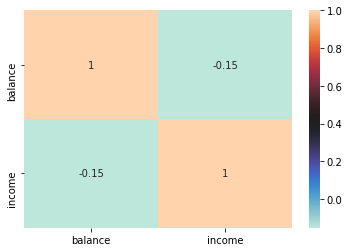

In [14]:
#correlation map for numerical features in the dataset
sns.heatmap(ds.corr(),cmap='icefire',annot=True)

From the above heatmap we can clearly see that the income and balance has very low and negative correlation of -0.15

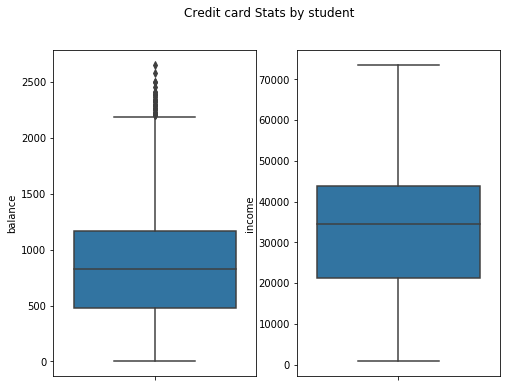

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

fig.suptitle('Credit card Stats by student')

sns.boxplot(ax=axes[0], data=ds, x='balance',hue = 'default',orient='v')
sns.boxplot(ax=axes[1], data=ds, x='income', hue = 'default',orient='v')

From the box plot we can see that the balance variable has outliers

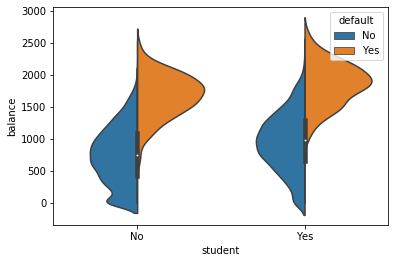

In [19]:
sns.violinplot(data=ds, x="student", y="balance", hue="default", split=True)

#### Checking for missing values

In [20]:
ds.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

There is no missing value in the data set

#### Detecting and removing outlier
From the boxplot it is clearly seen that, the balance column is having outlier. So detecting and removing it from the dataset.

In [21]:
# Finding interquartile range

percentile25 = ds['balance'].quantile(0.25)
percentile75 = ds['balance'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [22]:
#detecting the outlier

print(ds[ds['balance'] > upper_limit])
print('\n')
print(ds[ds['balance'] < lower_limit])

     default student      balance        income
173      Yes     Yes  2205.799521  14271.492250
1136     Yes      No  2499.016750  51504.293960
1160     Yes     Yes  2502.684931  14947.519750
1359     Yes      No  2220.966201  40725.096210
1502     Yes     Yes  2332.878254  11770.234120
1609     Yes     Yes  2269.946966  18021.105950
2096     Yes     Yes  2261.848162  20030.165120
2140      No     Yes  2308.893236  19110.266410
2929     Yes     Yes  2387.314867  28296.914720
3162     Yes     Yes  2415.316994  17429.503370
3189     Yes      No  2228.472283  27438.348990
3702      No     Yes  2370.463612  24251.958720
3855     Yes     Yes  2321.882221  21331.314780
3913     Yes     Yes  2334.123559  19335.889290
3976      No     Yes  2388.174009   7832.135644
4060     Yes     Yes  2216.017669  20911.695640
4231     Yes     Yes  2291.617688  20837.209450
4831      No     Yes  2216.329753  24737.081760
5461     Yes     Yes  2247.421889  17926.723010
6075     Yes      No  2413.319449  38540

In [23]:
# Removing outlier from data

ds = ds[ds['balance'] < upper_limit]
ds.shape

(9969, 4)

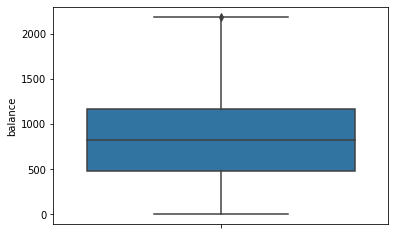

In [25]:
# Plotting the data again after removing the outlier

sns.boxplot(data=ds,x='balance',hue='default',orient='v')

#### Splitting dataset into regressor and response variable

In [26]:
y = ds.iloc[:,0].values
x = ds.iloc[:,1:].values

#### OneHot encoding for independent variable

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)
print(x[1])

[0.0 1.0 817.1804066000001 12106.1347]


#### Label Encoding for Target variable

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


#### Training and Test split

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [30]:
print('The shape of X_train is',x_train.shape)
print('The shape of y_train is',y_train.shape)
print('The shape of X_test is',x_test.shape)
print('The shape of y_test is',y_test.shape)

The shape of X_train is (6978, 4)
The shape of y_train is (6978,)
The shape of X_test is (2991, 4)
The shape of y_test is (2991,)


#### Scaling data

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,2:]=sc.fit_transform(x_train[:,2:])
x_test[:,2:]=sc.transform(x_test[:,2:])

In [32]:
x_train

array([[1.0, 0.0, -1.7295295874754215, -0.24640013307261724],
       [1.0, 0.0, 1.706799596575958, 0.19313401787426798],
       [1.0, 0.0, -0.6892945726088449, 0.4041138930071116],
       ...,
       [1.0, 0.0, -0.1824346575750931, 0.06254621593870595],
       [1.0, 0.0, -0.8121147083738018, 0.44144405940150494],
       [1.0, 0.0, -0.6907699031089672, 1.3652387828175276]], dtype=object)

<font size='4'><b>Model Building </b></font>

#### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_pred = clf.predict(x_test)

In [35]:
pd.DataFrame(zip(y_test,y_pred),columns = ['Actual_Y','Predicted_Y'])

,Actual_Y,Predicted_Y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


#### XGBoost Classifier

In [36]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [37]:
y_pred_xgb = clf_xgb.predict(x_test)

<font size='4'><b>Model Evaluation </b></font>

#### Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test,y_pred)
cm_xgb = confusion_matrix(y_test,y_pred_xgb)

In [39]:
print('The confucion matrix of random forest classifier is: \n',cm_rf)
print('The confucion matrix of XG-Boost classifier is: \n',cm_xgb)

The confucion matrix of random forest classifier is: 
 [[2872   23]
 [  78   18]]
The confucion matrix of XG-Boost classifier is: 
 [[2875   20]
 [  74   22]]


#### Accuracy

In [40]:
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_test,y_pred)
acc_xgb = accuracy_score(y_test,y_pred_xgb)

In [41]:
print('The accuracy of random forest classifier is: \n',acc_rf)
print('The accuracy of XG-Boost classifier is: \n',acc_xgb)

The accuracy of random forest classifier is: 
 0.9662320294215981
The accuracy of XG-Boost classifier is: 
 0.968572383818121


#### F1-Score

In [42]:
from sklearn.metrics import f1_score
f1_rf = f1_score(y_test,y_pred)
f1_xgb = f1_score(y_test,y_pred_xgb)

In [43]:
print('The F1-Score of random forest classifier is: \n',f1_rf)
print('The F1-Score of XG-Boost classifier is: \n',f1_xgb)

The F1-Score of random forest classifier is: 
 0.26277372262773724
The F1-Score of XG-Boost classifier is: 
 0.31884057971014496


#### AUC-ROC Curve

In [44]:
from sklearn.metrics import roc_auc_score
roc_rf = roc_auc_score(y_test,y_pred)
roc_xgb = roc_auc_score(y_test,y_pred_xgb)

In [45]:
print('The AUC-ROC Curve of random forest classifier is: \n',roc_rf)
print('The AUC-ROC Curve of XG-Boost classifier is: \n',roc_xgb)

The AUC-ROC Curve of random forest classifier is: 
 0.589777633851468
The AUC-ROC Curve of XG-Boost classifier is: 
 0.6111291018998273


<font size='4'><b>Compare the performance of Random Forest classifier and XG-Boost classifier </b></font>

In [46]:
comp = [['Accuracy',round(acc_rf,2),round(acc_xgb,2)],
       ['F1-Score',round(f1_rf,2),round(f1_xgb,2)],
       ['AUC-ROC Curve',round(roc_rf,2),round(roc_xgb,2)]]

In [47]:
pd.DataFrame(comp,columns=['metrics','Random_Forest','XG-Boost'])

,metrics,Random_Forest,XG-Boost
0,Accuracy,0.97,0.97
1,F1-Score,0.26,0.32
2,AUC-ROC Curve,0.59,0.61
